In [1]:
# Import Libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random 
import scipy.stats as stats
import seaborn as sn
from scipy.stats import linregress

In [2]:
random.seed(42)

In [3]:
# Import clean data

file_path = "Output_data/spotify_clean.csv"

spotify_df = pd.read_csv(file_path, low_memory=False)

# Let the data speak to you 
                                        - Jeff , UTSA Bootcamp

In [4]:
# Look at data frame summary

spotify_df.head()

,year,artists,acousticness,danceability,energy,instrumentalness,loudness,popularity,speechiness,valence
0,1920,Mamie Smith,0.991000,0.598,0.224,0.000522,-12.628,12,0.0936,0.6340
1,1920,Screamin Jay Hawkins,0.643000,0.852,0.517,0.026400,-7.261,7,0.0534,0.9500
2,1920,Mamie Smith,0.993000,0.647,0.186,0.000018,-12.098,4,0.1740,0.6890
3,1920,Oscar Velazquez,0.000173,0.730,0.798,0.801000,-7.311,17,0.0425,0.0422
4,1920,Mixe,0.295000,0.704,0.707,0.000246,-6.036,2,0.0768,0.2990


## How has music chaged over time .. lets see..

In [5]:
# Create bins for decades

bins  = [1920,1929,1939,1949,1959,1969,1979,1989,1999,2009,2019,2030]
bin_group = ['1920-1929','1930-1939','1940-1949','1950-1959','1960-1969','1970-1979','1980-1989','1990-1999','2000-2009','2010-2019','2020 +']
# Sort df by bins

spotify_copy = spotify_df
spotify_copy['decade'] = pd.cut(spotify_copy['year'],bins,labels=bin_group,include_lowest=True)
spotify_copy = spotify_copy[['decade', 'artists', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'loudness', 'popularity', 'speechiness',
       'valence']]
song_count = spotify_copy.groupby('decade')['artists'].count()
song_count

decade
1920-1929     5631
1930-1939    10760
1940-1949    15491
1950-1959    20000
1960-1969    19610
1970-1979    20108
1980-1989    20074
1990-1999    20328
2000-2009    13779
2010-2019    22441
2020 +        6132
Name: artists, dtype: int64

In [6]:
# Generate a grouped dataframe to show average music characteristics

spotify_line = spotify_copy[['decade','acousticness','danceability','energy','instrumentalness','speechiness','valence']]
song_line = spotify_line.groupby('decade').mean()

# Generate a line chart showing music characteristics change over decades
x_labels = ['1920s','1930s','1940s','1950s','1960s','1970s','1980s','1990s','2000s','2010s','2020+']
#x_axis = x_labels
y_labels = ['acousticness','danceability','energy','instrumentalness','speechiness','valence']
y_line = song_line[['acousticness','danceability','energy','instrumentalness','speechiness','valence']]


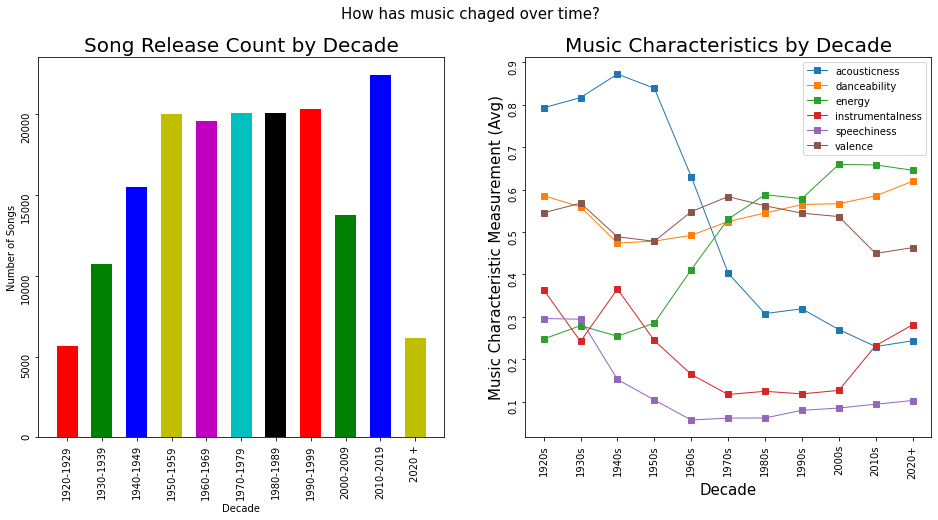

In [7]:
# Generate a bar plot showing total songs released by decade

x_axis = song_count.index
y_axis = song_count

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("XYZ")
fig.set_figheight(7)
fig.set_figwidth(16)

fig.suptitle('How has music chaged over time?', fontsize=15)

ax1.bar(x_axis, y_axis,width=.6,color=['r', 'g', 'b', 'y', 'm', 'c', 'k'] )
ax1.set_title('Song Release Count by Decade',fontsize=20)
ax1.set_ylabel('Number of Songs')
ax1.set_xlabel('Decade')
ax1.tick_params(labelrotation=90)

#Subplot 2

ax2.plot(x_labels, y_line, marker='s',linewidth=1)
ax2.set_title('Music Characteristics by Decade',fontsize=20)
ax2.set_ylabel('Music Characteristic Measurement (Avg)',fontsize=15)
ax2.set_xlabel('Decade',fontsize=15)
ax2.legend(y_labels,loc ='upper right')
ax2.tick_params(labelrotation=90)
plt.show()

###  Question 1 : Does the decade impact release counts of songs

### Null Hypo - There is no statistically significant diffrence in number of releases over time
### Alter Hypo - There is statistically significant diffrence in number of releases over time

In [8]:
spotify_copy.head()

,decade,artists,acousticness,danceability,energy,instrumentalness,loudness,popularity,speechiness,valence
0,1920-1929,Mamie Smith,0.991000,0.598,0.224,0.000522,-12.628,12,0.0936,0.6340
1,1920-1929,Screamin Jay Hawkins,0.643000,0.852,0.517,0.026400,-7.261,7,0.0534,0.9500
2,1920-1929,Mamie Smith,0.993000,0.647,0.186,0.000018,-12.098,4,0.1740,0.6890
3,1920-1929,Oscar Velazquez,0.000173,0.730,0.798,0.801000,-7.311,17,0.0425,0.0422
4,1920-1929,Mixe,0.295000,0.704,0.707,0.000246,-6.036,2,0.0768,0.2990


In [9]:
song_count = pd.DataFrame(song_count[:-1])
song_count

,artists
decade,
1920-1929,5631
1930-1939,10760
1940-1949,15491
1950-1959,20000
1960-1969,19610
1970-1979,20108
1980-1989,20074
1990-1999,20328
2000-2009,13779


In [10]:
expected = int(song_count.sum()/song_count.count())
expected

16822

In [11]:
song_count['Expected'] = expected
song_count.columns= ["Releases" , 'Expected']
song_count

,Releases,Expected
decade,,
1920-1929,5631,16822
1930-1939,10760,16822
1940-1949,15491,16822
1950-1959,20000,16822
1960-1969,19610,16822
1970-1979,20108,16822
1980-1989,20074,16822
1990-1999,20328,16822
2000-2009,13779,16822


In [12]:
# The degree of freedom is 10-1 = 9
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 9)
critical_value

16.918977604620448

In [13]:
# Run the chi square test with stats.chisquare()
stats.chisquare(song_count['Releases'], song_count['Expected'])

Power_divergenceResult(statistic=15225.82689335394, pvalue=0.0)

# How has Rolling Stones Music Style Evolved Over Time?


In [18]:
# Create data frame sorted by the artist, The Rolling Stones
spotify_stones = spotify_copy[spotify_copy['artists']=='The Rolling Stones']
spotify_stones.head()

,decade,artists,acousticness,danceability,energy,instrumentalness,loudness,popularity,speechiness,valence
8839,1960-1969,The Rolling Stones,0.0239,0.603,0.689,0.000003,-10.729,46,0.0304,0.7610
8868,1960-1969,The Rolling Stones,0.0383,0.723,0.863,0.031700,-7.890,77,0.0338,0.9310
8954,1960-1969,The Rolling Stones,0.1780,0.578,0.429,0.000060,-9.601,55,0.0268,0.0889
8964,1960-1969,The Rolling Stones,0.0289,0.579,0.877,0.571000,-8.830,54,0.0488,0.9000
8974,1960-1969,The Rolling Stones,0.2910,0.508,0.645,0.000003,-9.012,53,0.0395,0.4120


In [19]:
stones_count = spotify_stones.groupby('decade')['artists'].count()
stones_values = stones_count.values[4:]
stones_index = stones_count.index[4:] 
stones_index

CategoricalIndex(['1960-1969', '1970-1979', '1980-1989', '1990-1999',
                  '2000-2009', '2010-2019', '2020 +'],
                 categories=['1920-1929', '1930-1939', '1940-1949', '1950-1959', '1960-1969', '1970-1979', '1980-1989', '1990-1999', ...], ordered=True, name='decade', dtype='category')

C:\Users\ubc\anaconda3\envs\pythonData\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  after removing the cwd from sys.path.


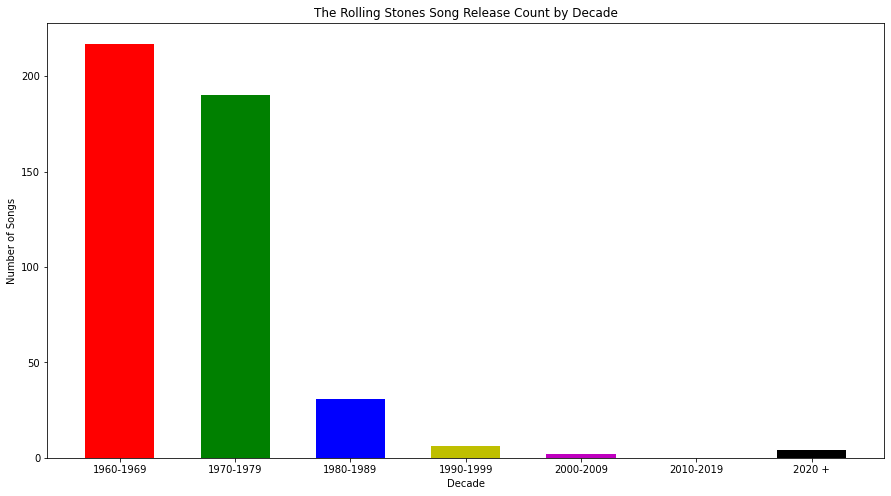

In [20]:
x_axis = stones_index
y_axis = stones_values
plt.figure(figsize=(15,8))
plt.bar(x_axis, y_axis,width=.6,color='rgbymck')
plt.title('The Rolling Stones Song Release Count by Decade')
plt.ylabel('Number of Songs')
plt.xlabel('Decade')
plt.show()

In [21]:
# Generate a grouped dataframe to show average music characteristics

stones_line = spotify_stones[['decade','acousticness','danceability','energy','instrumentalness','speechiness','valence']]
stones_line = stones_line.groupby('decade').mean()
#decade_list = ['1920-1929','1930-1939','1940-1949','1950-1959']
#stones_line = stones_line.loc['2010-2019',:].fillna(0)
#stones_line[stones_line.index!=decade_list]
#stones_line = stones_line.fillna(0)
stones_line = stones_line.dropna()
x_values = stones_line.index
y_values = stones_line.values
stones_line

,acousticness,danceability,energy,instrumentalness,speechiness,valence
decade,,,,,,
1960-1969,0.271924,0.541876,0.662226,0.119712,0.051075,0.650966
1970-1979,0.360438,0.506505,0.766558,0.278883,0.046464,0.678479
1980-1989,0.151535,0.572903,0.840097,0.136625,0.072494,0.677968
1990-1999,0.178768,0.572500,0.696667,0.059544,0.039933,0.505667
2000-2009,0.008875,0.405500,0.785000,0.032738,0.080850,0.498000
2020 +,0.046190,0.306000,0.754250,0.051245,0.054125,0.324550


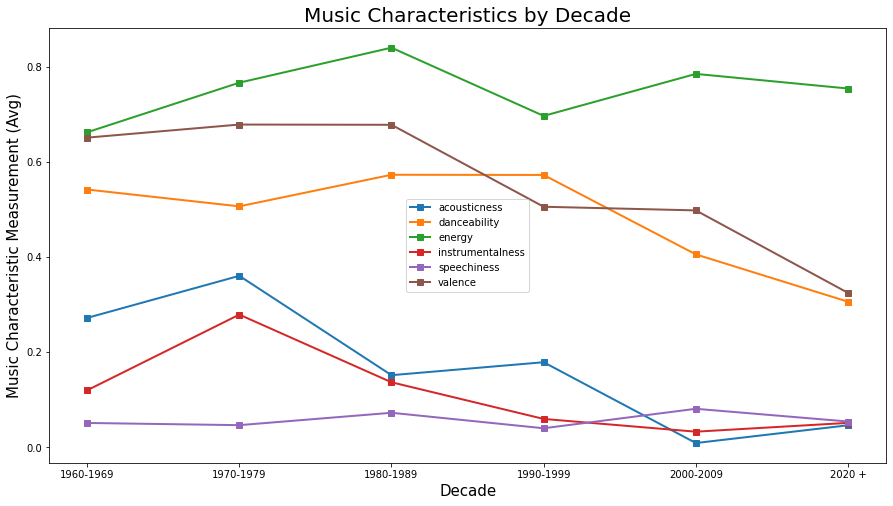

In [22]:
# Generate a line chart showing music characteristics change over decades
x_labels = ['1960s','1970s','1980s','1990s','2000s','2010s','2020+']
y_labels = ['acousticness','danceability','energy','instrumentalness','speechiness','valence']
#y_axis = song_line[['acousticness','danceability','energy','instrumentalness','speechiness','valence']]
plt.figure(figsize=(15,8))
plt.plot(x_values, y_values, marker='s',linewidth=2)
plt.title('Music Characteristics by Decade',fontsize=20)
plt.ylabel('Music Characteristic Measurement (Avg)',fontsize=15)
plt.xlabel('Decade',fontsize=15)
plt.legend(y_labels)
plt.show()

In [23]:
spotify_stones

,decade,artists,acousticness,danceability,energy,instrumentalness,loudness,popularity,speechiness,valence
8839,1960-1969,The Rolling Stones,0.0239,0.603,0.689,0.000003,-10.729,46,0.0304,0.7610
8868,1960-1969,The Rolling Stones,0.0383,0.723,0.863,0.031700,-7.890,77,0.0338,0.9310
8954,1960-1969,The Rolling Stones,0.1780,0.578,0.429,0.000060,-9.601,55,0.0268,0.0889
8964,1960-1969,The Rolling Stones,0.0289,0.579,0.877,0.571000,-8.830,54,0.0488,0.9000
8974,1960-1969,The Rolling Stones,0.2910,0.508,0.645,0.000003,-9.012,53,0.0395,0.4120
...,...,...,...,...,...,...,...,...,...,...
166470,1980-1989,The Rolling Stones,0.1300,0.477,0.982,0.372000,-3.343,32,0.0945,0.5490
166514,1980-1989,The Rolling Stones,0.2120,0.616,0.973,0.151000,-3.431,27,0.0538,0.8930
166644,1980-1989,The Rolling Stones,0.0148,0.592,0.909,0.177000,-5.887,31,0.0512,0.4790
168928,1990-1999,The Rolling Stones,0.7220,0.386,0.316,0.000012,-9.595,37,0.0308,0.1910


In [24]:
df_copy = stones_line.copy()
df_copy['decade_name'] = df_copy.index
df_copy = df_copy.reset_index(drop=False)
df_copy['decade_num'] = 0


df_copy

,decade,acousticness,danceability,energy,instrumentalness,speechiness,valence,decade_name,decade_num
0,1960-1969,0.271924,0.541876,0.662226,0.119712,0.051075,0.650966,1960-1969,0
1,1970-1979,0.360438,0.506505,0.766558,0.278883,0.046464,0.678479,1970-1979,0
2,1980-1989,0.151535,0.572903,0.840097,0.136625,0.072494,0.677968,1980-1989,0
3,1990-1999,0.178768,0.572500,0.696667,0.059544,0.039933,0.505667,1990-1999,0
4,2000-2009,0.008875,0.405500,0.785000,0.032738,0.080850,0.498000,2000-2009,0
5,2020 +,0.046190,0.306000,0.754250,0.051245,0.054125,0.324550,2020 +,0


In [25]:
df_copy.loc[df_copy['decade_name'] =='1960-1969',['decade_num']] = 1
df_copy.loc[df_copy['decade_name'] =='1970-1979',['decade_num']] = 2
df_copy.loc[df_copy['decade_name'] =='1980-1989',['decade_num']] = 3
df_copy.loc[df_copy['decade_name'] =='1990-1999',['decade_num']] = 4
df_copy.loc[df_copy['decade_name'] =='2000-2009',['decade_num']] = 5
df_copy.loc[df_copy['decade_name'] =='2020 +',['decade_num']] = 6
df_copy

,decade,acousticness,danceability,energy,instrumentalness,speechiness,valence,decade_name,decade_num
0,1960-1969,0.271924,0.541876,0.662226,0.119712,0.051075,0.650966,1960-1969,1
1,1970-1979,0.360438,0.506505,0.766558,0.278883,0.046464,0.678479,1970-1979,2
2,1980-1989,0.151535,0.572903,0.840097,0.136625,0.072494,0.677968,1980-1989,3
3,1990-1999,0.178768,0.572500,0.696667,0.059544,0.039933,0.505667,1990-1999,4
4,2000-2009,0.008875,0.405500,0.785000,0.032738,0.080850,0.498000,2000-2009,5
5,2020 +,0.046190,0.306000,0.754250,0.051245,0.054125,0.324550,2020 +,6


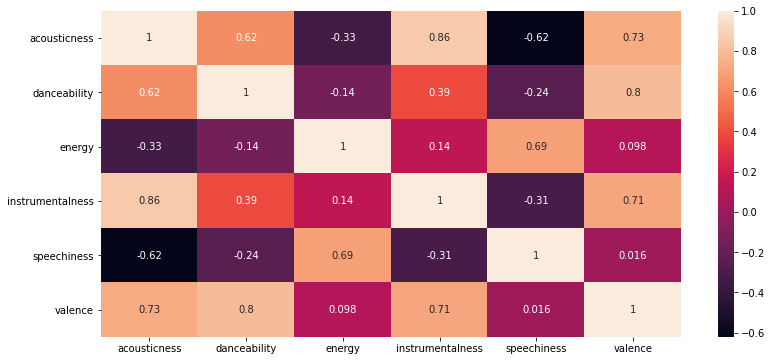

In [26]:

cormatrix = stones_line.corr()
plt.figure(figsize=(13,6))
sn.heatmap(cormatrix, annot=True)
plt.show()

In [28]:
Stones_speechiness = stones_line.speechiness
Stones_speechiness

decade
1960-1969    0.051075
1970-1979    0.046464
1980-1989    0.072494
1990-1999    0.039933
2000-2009    0.080850
2020 +       0.054125
Name: speechiness, dtype: float64

In [29]:
Stones_energy = stones_line.energy
Stones_energy

decade
1960-1969    0.662226
1970-1979    0.766558
1980-1989    0.840097
1990-1999    0.696667
2000-2009    0.785000
2020 +       0.754250
Name: energy, dtype: float64

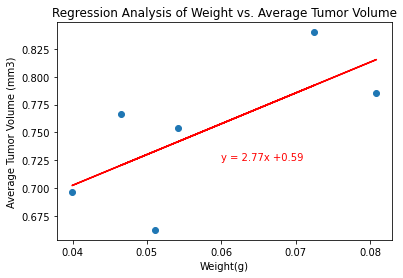

The r-value is: 0.48
The p-value is: 0.02


In [62]:
x_axis = Stones_speechiness
y_axis = Stones_energy
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,'r-')
plt.annotate(line_eq,xy=(0.06,0.725),color='red')
plt.title('Regression Analysis of Weight vs. Average Tumor Volume')
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
print(f"The r-value is: {round(rvalue**2,2)}")
print(f"The p-value is: {round(pvalue**2,2)}")

## Question 3 : Are energy and speechiness correlation?

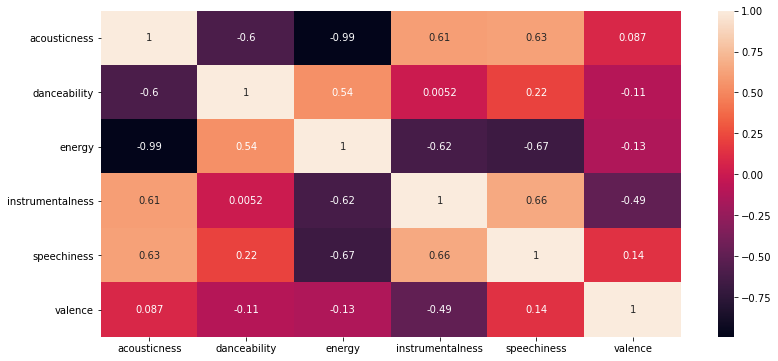

In [49]:
corrMatrix = song_line.corr()
plt.figure(figsize=(13,6))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [50]:
song_line

,acousticness,danceability,energy,instrumentalness,speechiness,valence
decade,,,,,,
1920-1929,0.792778,0.585578,0.247832,0.363801,0.296223,0.545307
1930-1939,0.816630,0.559255,0.279390,0.242260,0.294554,0.567854
1940-1949,0.872126,0.473938,0.254432,0.365702,0.152777,0.488856
1950-1959,0.838657,0.478492,0.285336,0.244406,0.104190,0.478069
1960-1969,0.630583,0.492195,0.411080,0.164533,0.057077,0.548013
1970-1979,0.403245,0.524755,0.530446,0.117244,0.061482,0.583425
1980-1989,0.307810,0.544783,0.588056,0.124724,0.061901,0.561804
1990-1999,0.319077,0.564811,0.578511,0.118622,0.079917,0.544343
2000-2009,0.270265,0.566687,0.659194,0.126818,0.085232,0.536429


In [51]:
spotify_speechiness = song_line.speechiness
spotify_speechiness

decade
1920-1929    0.296223
1930-1939    0.294554
1940-1949    0.152777
1950-1959    0.104190
1960-1969    0.057077
1970-1979    0.061482
1980-1989    0.061901
1990-1999    0.079917
2000-2009    0.085232
2010-2019    0.094296
2020 +       0.102964
Name: speechiness, dtype: float64

In [52]:
spotify_energy = song_line.energy
spotify_energy

decade
1920-1929    0.247832
1930-1939    0.279390
1940-1949    0.254432
1950-1959    0.285336
1960-1969    0.411080
1970-1979    0.530446
1980-1989    0.588056
1990-1999    0.578511
2000-2009    0.659194
2010-2019    0.657996
2020 +       0.645556
Name: energy, dtype: float64

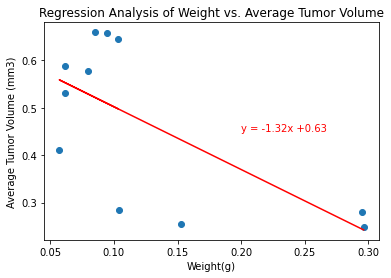

The r-value is: 0.45
The p-value is: 0.0


In [61]:
x_axis = spotify_speechiness
y_axis = spotify_energy
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,'r-')
plt.annotate(line_eq,xy=(0.2,0.45),color='red')
plt.title('Regression Analysis of Weight vs. Average Tumor Volume')
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
print(f"The r-value is: {round(rvalue**2,2)}")
print(f"The p-value is: {round(pvalue**2,2)}")